# Logistic Regression with the Titanic
## CSC 570: Data Science Essentials
## Evan Thompson  

In [58]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
#reading the data from the disk into memory
df = pd.read_csv("train.csv")


# What data features cause the highest likelihood of survival?

Taken from [Kaggle](kaggle.com/c/titanic/data)  

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [60]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

## The assumption that I am taking is that the higher the class in addition to family aboard leads to a higher chance of survival.

In [61]:


# create a new data frame and only put the variables to use in

X = pd.DataFrame()
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['pclass'] = df['Pclass']
X['survived'] = df['Survived']

In [62]:
# drop the missing values.
X = X.dropna(axis=0)

In [63]:
# survived is the dependent variable, y.
y = X['survived']
X = X.drop(['survived'], axis=1)

In [64]:
# create a variable for whether the passenger had family aboard. 
# If either sibling/spouse or parch are true, then hasFamily is true.

#X['hasFamily'] = X[(X.sibsp < 1) or (X.parch < 1)]

In [65]:
X['hassib'] = X.sibsp < 1
X['hassib']
X['haspar'] = X.parch < 1
X['haspar']


0       True
1       True
2       True
3       True
4       True
5       True
6       True
7      False
8      False
9       True
10     False
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861     True
862     True
863    False
864     True
865     True
866     True
867     True
868     True
869    False
870     True
871    False
872     True
873     True
874     True
875     True
876     True
877     True
878     True
879    False
880    False
881     True
882     True
883     True
884     True
885    False
886     True
887     True
888    False
889     True
890     True
Name: haspar, dtype: bool

In [66]:
X.columns

Index([u'sibsp', u'parch', u'pclass', u'hassib', u'haspar'], dtype='object')

In [68]:
X.columns

Index([u'sibsp', u'parch', u'pclass', u'hassib', u'haspar'], dtype='object')

In [69]:
pd.get_dummies(X.hassib)
pd.get_dummies(X.haspar)

,False,True
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,1.0,0.0
9,0.0,1.0


In [70]:
X['hassib'] = pd.get_dummies(X.hassib)[True]

In [71]:
X['haspar'] = pd.get_dummies(X.haspar)[True]

X

,sibsp,parch,pclass,hassib,haspar
0,1,0,3,0.0,1.0
1,1,0,1,0.0,1.0
2,0,0,3,1.0,1.0
3,1,0,1,0.0,1.0
4,0,0,3,1.0,1.0
5,0,0,3,1.0,1.0
6,0,0,1,1.0,1.0
7,3,1,3,0.0,0.0
8,0,2,3,1.0,0.0
9,1,0,2,0.0,1.0


In [72]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [73]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [75]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.59


In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [77]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.73


In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [80]:
print "---Base Model---"
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print "Base Rate AUC = %2.2f" % base_roc_auc
print classification_report(y_test,base_rate_model(X_test) )
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.72
             precision    recall  f1-score   support

          0       0.76      0.80      0.78       105
          1       0.69      0.64      0.66        74

avg / total       0.73      0.73      0.73       179



In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

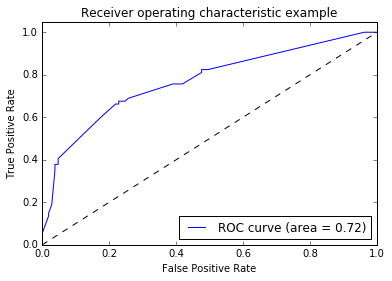

In [82]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()